Downlod Packages

In [ ]:
!pip install cdlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.6/228.6 kB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 70.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 43.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 98.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 91.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.1/174.1 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 119.1 MB/s eta 0:00:00
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395106 sha256=acf1e285f74a9b969e234f738790a337693a60dbaa4450e6776b28af2c5b1b33
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sci
import numpy as np
import numpy.linalg as linalg
import numpy.random as rand
import pandas as pd
from platform import node

In [ ]:
from cdlib.classes.node_clustering import NodeClustering
import community.community_louvain as community_louvain
from cdlib import algorithms, viz
import cdlib as cd
from collections import defaultdict
import networkx as nx
import cdlib.algorithms as algo
import cdlib.viz as viz
import matplotlib.pyplot as plt

Note: to be able to use all crisp methods, you need to install some additional packages:  {'karateclub', 'leidenalg', 'infomap', 'wurlitzer', 'graph_tool'}
Note: to be able to use all overlapping methods, you need to install some additional packages:  {'karateclub', 'ASLPAw'}
Note: to be able to use all bipartite methods, you need to install some additional packages:  {'infomap', 'leidenalg', 'wurlitzer'}


Upload Data Files

In [ ]:
from google.colab import files
uploaded = files.upload()

edges = pd.read_csv("edges.csv")
nodes = pd.read_csv("nodes.csv")
hero_network = pd.read_csv("hero-network.csv")

Saving edges.csv to edges.csv
Saving hero-network.csv to hero-network.csv
Saving nodes.csv to nodes.csv


Read Data

In [ ]:
edges.head()

,hero,comic
0,24-HOUR MAN/EMMANUEL,AA2 35
1,3-D MAN/CHARLES CHAN,AVF 4
2,3-D MAN/CHARLES CHAN,AVF 5
3,3-D MAN/CHARLES CHAN,COC 1
4,3-D MAN/CHARLES CHAN,H2 251


In [ ]:
nodes.head()

,node,type
0,2001 10,comic
1,2001 8,comic
2,2001 9,comic
3,24-HOUR MAN/EMMANUEL,hero
4,3-D MAN/CHARLES CHAN,hero


In [ ]:
hero_network.head()

,hero1,hero2
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


Define Functions:
- Louvain Algorithm

In [ ]:
def louvain(
    g_original: object,
    weight: str = "weight",
    resolution: float = 1.0,
    randomize: int = None) -> NodeClustering:
    """
    Louvain  maximizes a modularity score for each community.
    The algorithm optimises the modularity in two elementary phases:
    (1) local moving of nodes;
    (2) aggregation of the network.
    In the local moving phase, individual nodes are moved to the community that yields the largest increase in the quality function.
    In the aggregation phase, an aggregate network is created based on the partition obtained in the local moving phase.
    Each community in this partition becomes a node in the aggregate network. The two phases are repeated until the quality function cannot be increased further.


    **Supported Graph Types**

    ========== ======== ========
    Undirected Directed Weighted
    ========== ======== ========
    Yes        No       No
    ========== ======== ========

    :param g_original: a networkx/igraph object
    :param weight: str, optional the key in graph to use as weight. Default to 'weight'
    :param resolution: double, optional  Will change the size of the communities, default to 1.
    :param randomize: int, RandomState instance or None, optional (default=None). If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by `np.random`.
    :return: NodeClustering object


    :Example:

    >>> from cdlib import algorithms
    >>> import networkx as nx
    >>> G = nx.karate_club_graph()
    >>> coms = algorithms.louvain(G, weight='weight', resolution=1.)

    :References:

    Blondel, Vincent D., et al. `Fast unfolding of communities in large networks. <https://iopscience.iop.org/article/10.1088/1742-5468/2008/10/P10008/meta/>`_ Journal of statistical mechanics: theory and experiment 2008.10 (2008): P10008.

    .. note:: Reference implementation: https://github.com/taynaud/python-louvain
    """
    g = g_original
    coms = community_louvain.best_partition(
        g, weight=weight, resolution=resolution, randomize=randomize
    )

    # Reshaping the results
    coms_to_node = defaultdict(list)
    for n, c in coms.items():
        coms_to_node[c].append(n)

    coms_louvain = [list(c) for c in coms_to_node.values()]
    return cd.NodeClustering(
        coms_louvain,
        g_original,
        "Louvain",
        method_parameters={
            "weight": weight,
            "resolution": resolution,
            "randomize": randomize,
        },
    )

Building Graph For Data

In [ ]:
edges_sample = hero_network.sample(50000)
heroes = hero_network[['hero1', 'hero2']]
pairs = [tuple(x) for x in heroes.to_numpy()]
print(pairs[0:10])
print(len(pairs))

[('LITTLE, ABNER', 'PRINCESS ZANDA'), ('LITTLE, ABNER', "BLACK PANTHER/T'CHAL"), ("BLACK PANTHER/T'CHAL", 'PRINCESS ZANDA'), ('LITTLE, ABNER', 'PRINCESS ZANDA'), ('LITTLE, ABNER', "BLACK PANTHER/T'CHAL"), ("BLACK PANTHER/T'CHAL", 'PRINCESS ZANDA'), ('STEELE, SIMON/WOLFGA', 'FORTUNE, DOMINIC'), ('STEELE, SIMON/WOLFGA', 'ERWIN, CLYTEMNESTRA'), ('STEELE, SIMON/WOLFGA', 'IRON MAN/TONY STARK '), ('STEELE, SIMON/WOLFGA', 'IRON MAN IV/JAMES R.')]
574467


In [ ]:
nonw = []
[nonw.append(x) for x in pairs if x not in nonw]
print(len(nonw))

36949


In [ ]:
from collections import Counter
counts = list(Counter(pairs).most_common())
print(counts)
print(len(counts))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
realedges = [(x, y, z) for (x, y), z in counts]
print(realedges)

[('PATRIOT/JEFF MACE', 'MISS AMERICA/MADELIN', 114), ('PATRIOT/JEFF MACE', 'PATRIOT/JEFF MACE', 104), ('MISS AMERICA/MADELIN', 'MISS AMERICA/MADELIN', 63), ('MISS AMERICA/MADELIN', 'PATRIOT/JEFF MACE', 56), ('HUMAN TORCH/JOHNNY S', 'THING/BENJAMIN J. GR', 43), ('MR. FANTASTIC/REED R', 'THING/BENJAMIN J. GR', 35), ('HUMAN TORCH/JOHNNY S', 'MR. FANTASTIC/REED R', 35), ('INVISIBLE WOMAN/SUE ', 'THING/BENJAMIN J. GR', 34), ('THING/BENJAMIN J. GR', 'MR. FANTASTIC/REED R', 32), ('INVISIBLE WOMAN/SUE ', 'MR. FANTASTIC/REED R', 32), ('INVISIBLE WOMAN/SUE ', 'HUMAN TORCH/JOHNNY S', 31), ('THING/BENJAMIN J. GR', 'HUMAN TORCH/JOHNNY S', 29), ('WATSON-PARKER, MARY ', 'SPIDER-MAN/PETER PAR', 28), ('SPIDER-MAN/PETER PAR', 'JAMESON, J. JONAH', 28), ('MR. FANTASTIC/REED R', 'HUMAN TORCH/JOHNNY S', 28), ('THING/BENJAMIN J. GR', 'INVISIBLE WOMAN/SUE ', 27), ('SPIDER-MAN/PETER PAR', 'WATSON-PARKER, MARY ', 27), ('IRON MAN/TONY STARK ', 'THOR/DR. DONALD BLAK', 26), ('HUMAN TORCH/JOHNNY S', 'INVISIBLE WOMA

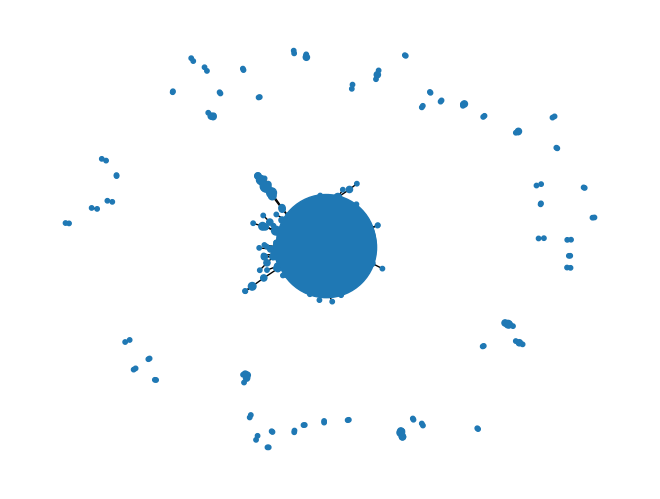

In [ ]:
N = nx.Graph()
N.add_edges_from(pairs)
posN = nx.spring_layout(N,scale=20,k=1/np.sqrt(N.order()))
d = dict(N.degree)
nx.draw(N,pos=posN,node_size=[d[k]*10 for k in d],with_labels=False)

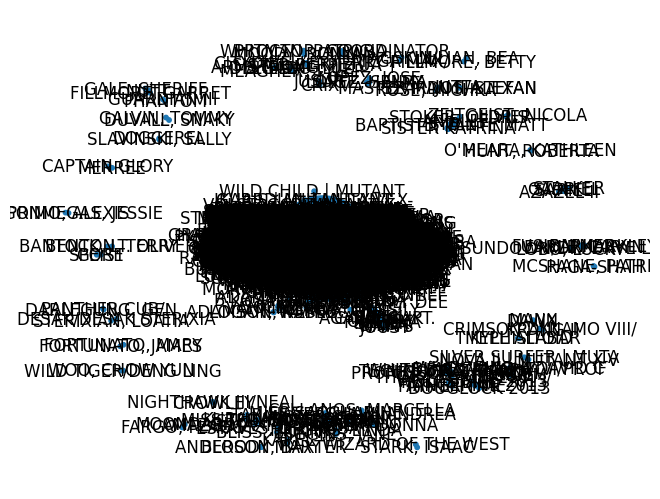

In [ ]:
G = nx.Graph()
G.add_weighted_edges_from(realedges)
posG = nx.spring_layout(G,scale=20,k=1/np.sqrt(G.order()))
d = dict(G.degree)
nx.draw(G,pos=posG,node_size=[d[k]*10 for k in d],with_labels=True)

Finding Clustering Coefficient

In [ ]:
Clust_Coeff = nx.average_clustering(G,weight = "weight",count_zeros=False)
print(Clust_Coeff)

0.005005798760569853




Running Louvain

75


Text(0.5, 1.0, 'Modularity = 0.5')

<Figure size 640x480 with 0 Axes>

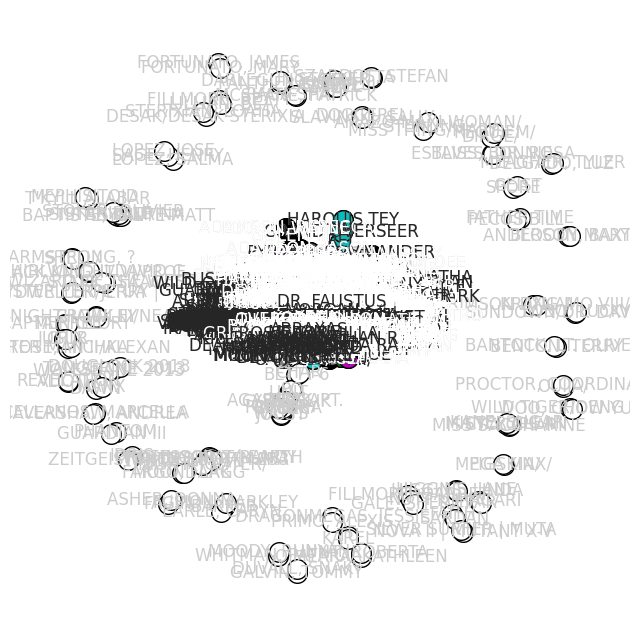

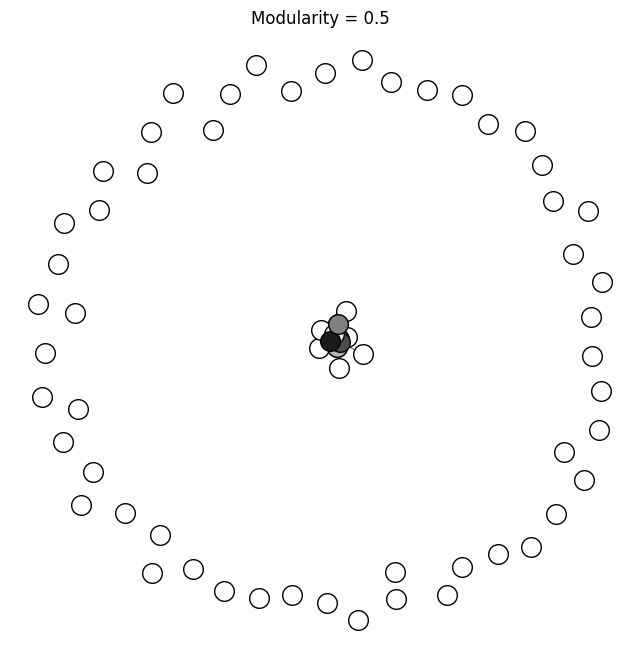

In [ ]:
node_cluster = louvain(G, randomize = True)
# We extract the communities that produced maximal modularity
com = node_cluster.communities
print(len(com))
# Then we'll use the cdlib functionality for vizualization
plt.figure(0)
# This is the output from Phase 1 of the Louvain.
# Notice the different attribute name to print node labels compared to nx.draw
viz.plot_network_clusters(G, node_cluster,plot_labels="False")
# This is the output of Phase 2 of the Louvain
viz.plot_community_graph(G, node_cluster)
# We can also extract the modularity of this
mod = node_cluster.newman_girvan_modularity()
plt.title('Modularity = ' + str(round(mod.score,2)))

In [ ]:
degrees = sorted(G.degree, key=lambda x: x[1], reverse=True)
print("Node Degree")
print(degrees)

Node Degree
[('CAPTAIN AMERICA', 523), ('SPIDER-MAN/PETER PAR', 510), ('IRON MAN/TONY STARK ', 434), ('WOLVERINE/LOGAN ', 382), ('THING/BENJAMIN J. GR', 372), ('THOR/DR. DONALD BLAK', 360), ('SCARLET WITCH/WANDA ', 351), ('BEAST/HENRY &HANK& P', 339), ('HUMAN TORCH/JOHNNY S', 333), ('MR. FANTASTIC/REED R', 332), ('INVISIBLE WOMAN/SUE ', 319), ('VISION ', 317), ('HAWK', 304), ('STORM/ORORO MUNROE S', 299), ('HULK/DR. ROBERT BRUC', 290), ('PROFESSOR X/CHARLES ', 287), ('COLOSSUS II/PETER RA', 285), ('WASP/JANET VAN DYNE ', 284), ('CYCLOPS/SCOTT SUMMER', 282), ('ANT-MAN/DR. HENRY J.', 275), ('DR. STRANGE/STEPHEN ', 264), ('ANGEL/WARREN KENNETH', 262), ('MARVEL GIRL/JEAN GRE', 256), ('ROGUE /', 254), ('HERCULES [GREEK GOD]', 253), ('ICEMAN/ROBERT BOBBY ', 251), ('SHE-HULK/JENNIFER WA', 249), ('WONDER MAN/SIMON WIL', 246), ('SUB-MARINER/NAMOR MA', 243), ('DAREDEVIL/MATT MURDO', 243), ('QUICKSILVER/PIETRO M', 241), ('NIGHTCRAWLER/KURT WA', 238), ('BLACK WIDOW/NATASHA ', 225), ('HAVOK/ALEX SU

Analyze Most Connected Heros

In [ ]:
N = 10
top = degrees[0:N]
Top_heroes = pd.DataFrame(top,columns=["hero","degree"])
print(Top_heroes)

                   hero  degree
0       CAPTAIN AMERICA     523
1  SPIDER-MAN/PETER PAR     510
2  IRON MAN/TONY STARK      434
3      WOLVERINE/LOGAN      382
4  THING/BENJAMIN J. GR     372
5  THOR/DR. DONALD BLAK     360
6  SCARLET WITCH/WANDA      351
7  BEAST/HENRY &HANK& P     339
8  HUMAN TORCH/JOHNNY S     333
9  MR. FANTASTIC/REED R     332


In [ ]:
min_edges = []
print(top)
for x in top:
  for i in realedges:
    if x in i:
      min_edges.append(i)
print(min_edges)

[('CAPTAIN AMERICA', 523), ('SPIDER-MAN/PETER PAR', 510), ('IRON MAN/TONY STARK ', 434), ('WOLVERINE/LOGAN ', 382), ('THING/BENJAMIN J. GR', 372), ('THOR/DR. DONALD BLAK', 360), ('SCARLET WITCH/WANDA ', 351), ('BEAST/HENRY &HANK& P', 339), ('HUMAN TORCH/JOHNNY S', 333), ('MR. FANTASTIC/REED R', 332)]
[]


vv Spectral Clustering vv

In [ ]:
# Call the spectral clustering function: the result is a node_clustering object 
# in the cdlib library
# This will require the number of clusters that we want to test for
node_cluster = algo.r_spectral_clustering(N,  n_clusters=4, method="vanilla")
# We get the communities of this
com = node_cluster.communities
print(com)
# Then we'll use the cdlib functionality for vizualization
plt.figure(1)
viz.plot_network_clusters(N, node_cluster, plot_labels="False")
# We can also extract the modularity of this
mod = node_cluster.newman_girvan_modularity()
plt.title('Modularity = ' + str(round(mod.score,2))) 

NetworkXUnfeasible: ignored